In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

from structure import (top_DBR, cavity, bottom_DBR)
from reflect import (snell, tmm_reflect)

Create microcavity structure from refractive indices and thicknesses

In [2]:
n1 = 1.5
n2 = 2.0
ncav = 1.0
nair = 1.0
q = 1
Npairs = 8
wl = 0.75

top = top_DBR(n1,n2,Npairs,wl)
cav = cavity(ncav,q,wl)
bottom = bottom_DBR(n2,n1,Npairs,wl)

total_cavity_n = np.append(top[0], cav[0])
total_cavity_n = np.append(total_cavity_n, bottom[0])

total_cavity_d = np.append(top[1], cav[1])
total_cavity_d = np.append(total_cavity_d, bottom[1])

print (total_cavity_d)
print (total_cavity_n)


[ 0.125    0.09375  0.125    0.09375  0.125    0.09375  0.125    0.09375
  0.125    0.09375  0.125    0.09375  0.125    0.09375  0.125    0.09375
  0.375    0.09375  0.125    0.09375  0.125    0.09375  0.125    0.09375
  0.125    0.09375  0.125    0.09375  0.125    0.09375  0.125    0.09375
  0.125  ]
[ 1.5  2.   1.5  2.   1.5  2.   1.5  2.   1.5  2.   1.5  2.   1.5  2.   1.5
  2.   1.   2.   1.5  2.   1.5  2.   1.5  2.   1.5  2.   1.5  2.   1.5  2.
  1.5  2.   1.5]


Test tmm_reflect

In [3]:
theta1 = 0
wl_i = 0.5
wl_f = 1.0
delta_wl = 0.001
polarisation = 's'

wl = wl_i
T = []
R = []
while (wl <= wl_f):
    R.append(tmm_reflect(polarisation, total_cavity_n, total_cavity_d, theta1, wl, 0)['R'])
    T.append(tmm_reflect(polarisation, total_cavity_n, total_cavity_d, theta1, wl, 0)['T'])
    wl = wl + delta_wl


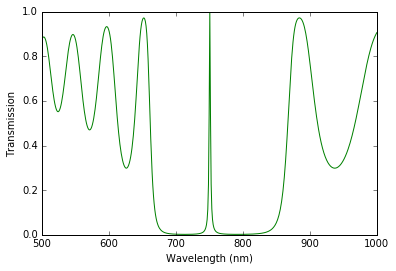

In [4]:
wavelength = np.linspace(wl_i,wl_f,(wl_f-wl_i)/delta_wl)
energy = 1.2398/wavelength

plt.figure(1)
plt.plot(wavelength*1000,T/np.amax(T), color = 'g')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')


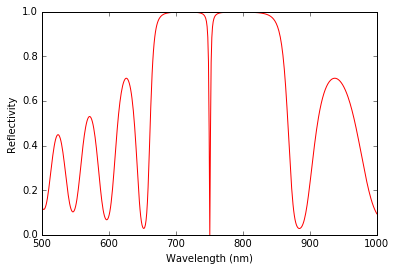

In [5]:
plt.figure(2)
plt.plot(wavelength*1000,R, color = 'r')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectivity')